In [1]:
import numpy as np
import matplotlib.pyplot as plt

## k-Means Clustering

In [2]:
np.random.seed(42)
num_observations = 150
num_features = 2

data = np.random.rand(num_observations, num_features) * 10

In [3]:
k = 3
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]

In [4]:
dists = np.zeros((data.shape[0],k))
for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

In [5]:
groupidx = np.argmin(dists,axis=1)

In [6]:
for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]),
                        np.mean(data[groupidx==ki,1]) ]

## Code Exercises

### Exercise 1

In [8]:
# the function
def corrAndCosine(x,y):
    print(f'x: {x}')
    print(f'y: {y}')

    # compute cosine similarity
    num = np.dot(x,y) # numerator
    den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    print(f'mean(x): {np.mean(x)}')
    print(f'mean(y): {np.mean(y)}')
    print(f'xm: {xm}')
    print(f'ym: {ym}')


    num = np.dot(xm,ym)
    den = np.linalg.norm(xm) * np.linalg.norm(ym)
    cor = num / den

    return cor,cos

# test it
# a = np.random.randn(15)
# b = np.random.randn(15)

# print the vectors
# print(a)
# print(b)

a = np.array([1,2,3])
b = np.array([4,5,6])


# compute the correlation and cosine
r,c = corrAndCosine(a,b)

print(f'r: {r}')
print(f'c: {c}')

# confirm that the correlation matches with np.corrcoef
print(r,np.corrcoef(a,b)[0,1])

x: [1 2 3]
y: [4 5 6]
mean(x): 2.0
mean(y): 5.0
xm: [-1.  0.  1.]
ym: [-1.  0.  1.]
r: 0.9999999999999998
c: 0.9746318461970762
0.9999999999999998 1.0


In [10]:
# the function with no print statements
def corrAndCosine(x,y):

    # compute cosine similarity
    num = np.dot(x,y) # numerator
    den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
    cos = num / den

    # compute correlation (similar to above but mean-centered!)
    xm = x-np.mean(x)
    ym = y-np.mean(y)

    num = np.dot(xm,ym)
    den = np.linalg.norm(xm) * np.linalg.norm(ym)
    cor = num / den

    return cor,cos


# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print( np.round(corrAndCosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corrAndCosine(aNoMean,bNoMean),4) )

# NOTE: In the printing code above, I rounded to 4 significant digits just for visual clarity.

Without mean-centering (should differ):
[-0.0764  0.1895]
 
With mean-centering (should be the same):
[-0.0764 -0.0764]


### Exercise 2

[0. 1. 2. 3.]
[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


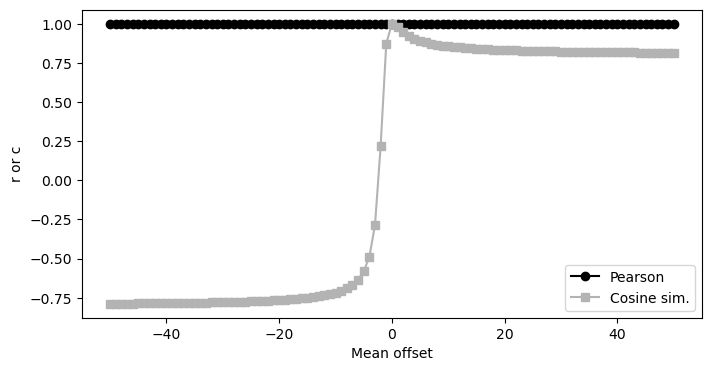

In [15]:
# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

print(a)
print(offsets)

# initialize the results
results = np.zeros((len(offsets),2))
# print(results)

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])

# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
# plt.savefig('Figure_04_02.png',dpi=300)
plt.show()

### Exercise 3

In [18]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y)
Source:   
def pearsonr(x, y):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.

    Parameters
    ----------
    x : (N,) array_like
        Input array.
    y : (N,) array_like
        Input array.

    Returns
    -------
    r : float
        Pearson's correlation coefficient.
    p-value : float
        Two-tailed p-value.

    Warns
    -----
    PearsonRConstantInputWarning
        Raised if an input 

### Exercise 4

In [55]:
# a bare-bones correlation function
def rho(x,y):
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    n = np.dot(xm,ym)
    d = np.linalg.norm(xm) * np.linalg.norm(ym)
    return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 29.56 ms
   pearsonr took 40.77 ms


In [60]:
# a bare-bones correlation function
def rho(x,y):
    xm = x-np.mean(x)
    ym = y-np.mean(y)
    n = np.dot(xm,ym)
    d = np.linalg.norm(xm) * np.linalg.norm(ym)
    return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
    x = np.random.randn(varLength,2)
    pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 55.34 ms
   pearsonr took 55.88 ms


### Exercise 5

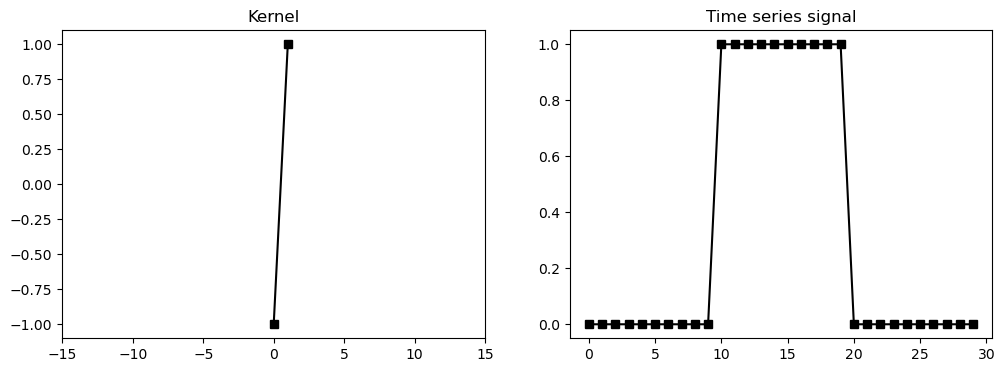

In [ ]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

# plt.savefig('Figure_04_04ab.png',dpi=300)
plt.show()

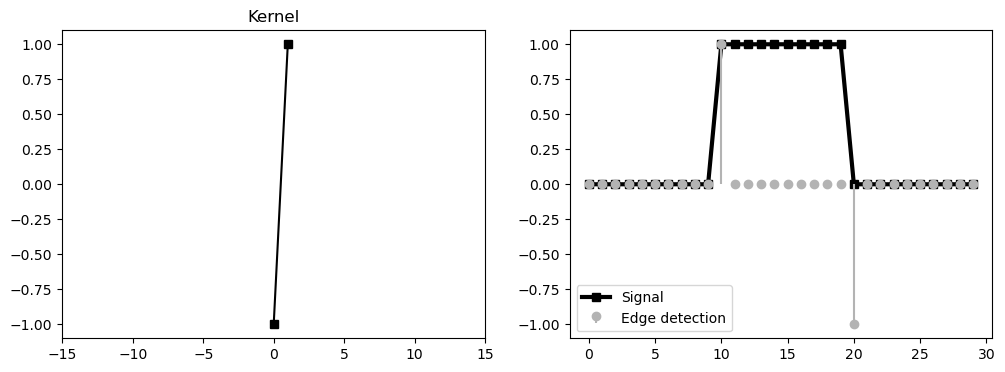

In [11]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

#loop over the signal and do themplate-matching (via dot products!)
for t in range(1,len(signal)-1):
    featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                 basefmt=' ',linefmt='',markerfmt='o',
                                 label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
# plt.savefig('Figure_04_04c.png',dpi=300)
plt.show()

### Exercise 6

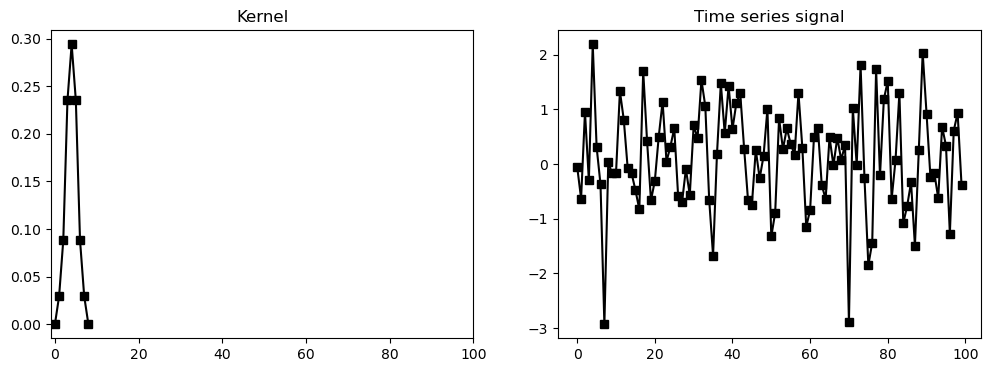

In [12]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

# plt.savefig('Figure_04_06ab.png',dpi=300)
plt.show()

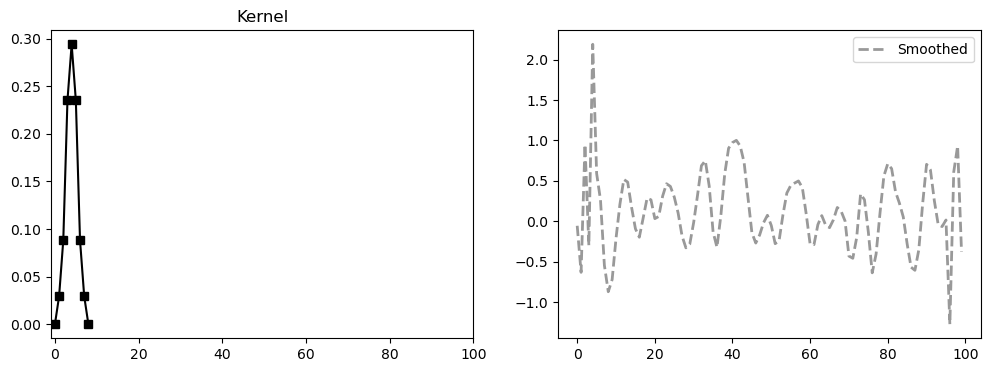

In [14]:

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

# axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

# plt.savefig('Figure_04_06c.png',dpi=300)
plt.show()

### Exercise 7

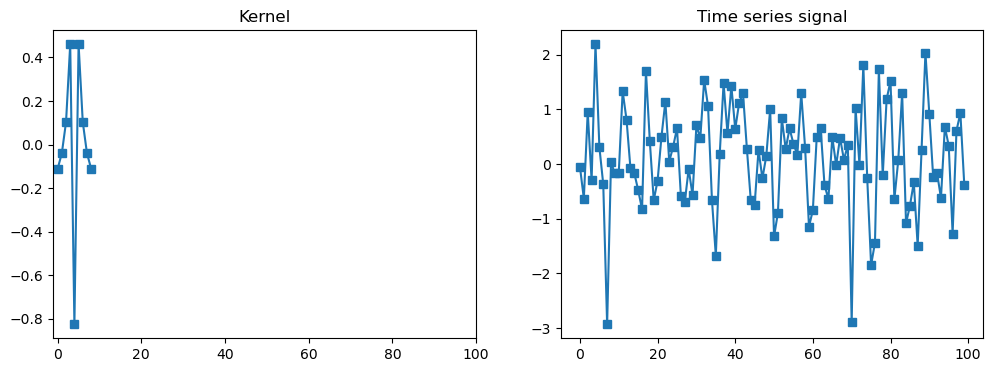

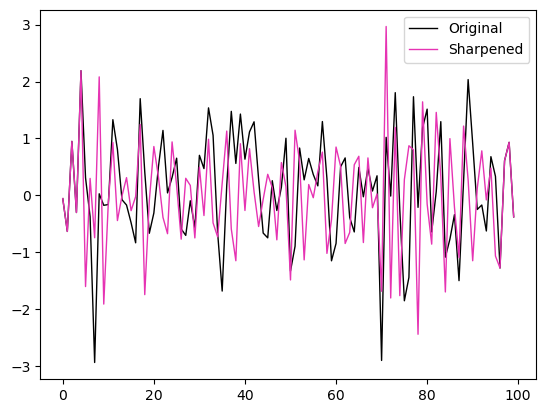

In [17]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

### Exercise 8

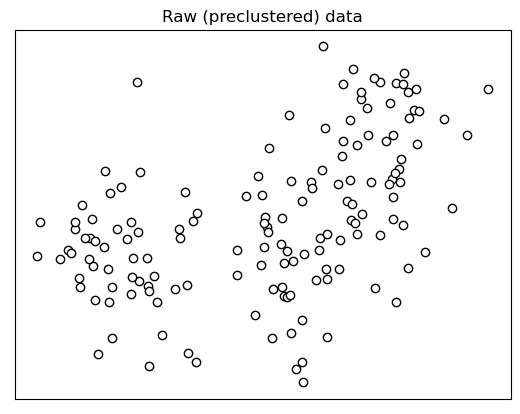

In [18]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

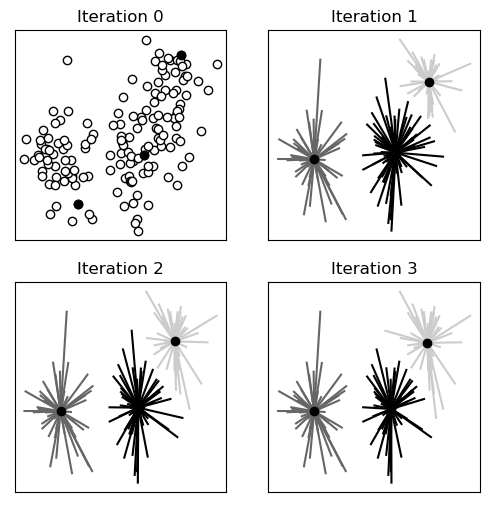

In [35]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


# plt.savefig('Figure_04_03.png',dpi=300)
plt.show()